In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree


In [2]:
data = pd.read_csv('ENB2012.csv')


In [3]:
data.columns = ["Relative Compactness", "Surface Area", "Wall Area",
                "Roof Area", "Overall Height", "Orientation", "Glazing Area",
                "Glazing Area Distribution", "Heating Load", "Cooling Load"]


In [4]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [7]:
data.isnull()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [8]:
data.mean()

Relative Compactness           0.764167
Surface Area                 671.708333
Wall Area                    318.500000
Roof Area                    176.604167
Overall Height                 5.250000
Orientation                    3.500000
Glazing Area                   0.234375
Glazing Area Distribution      2.812500
Heating Load                  22.307201
Cooling Load                  24.587760
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
data.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

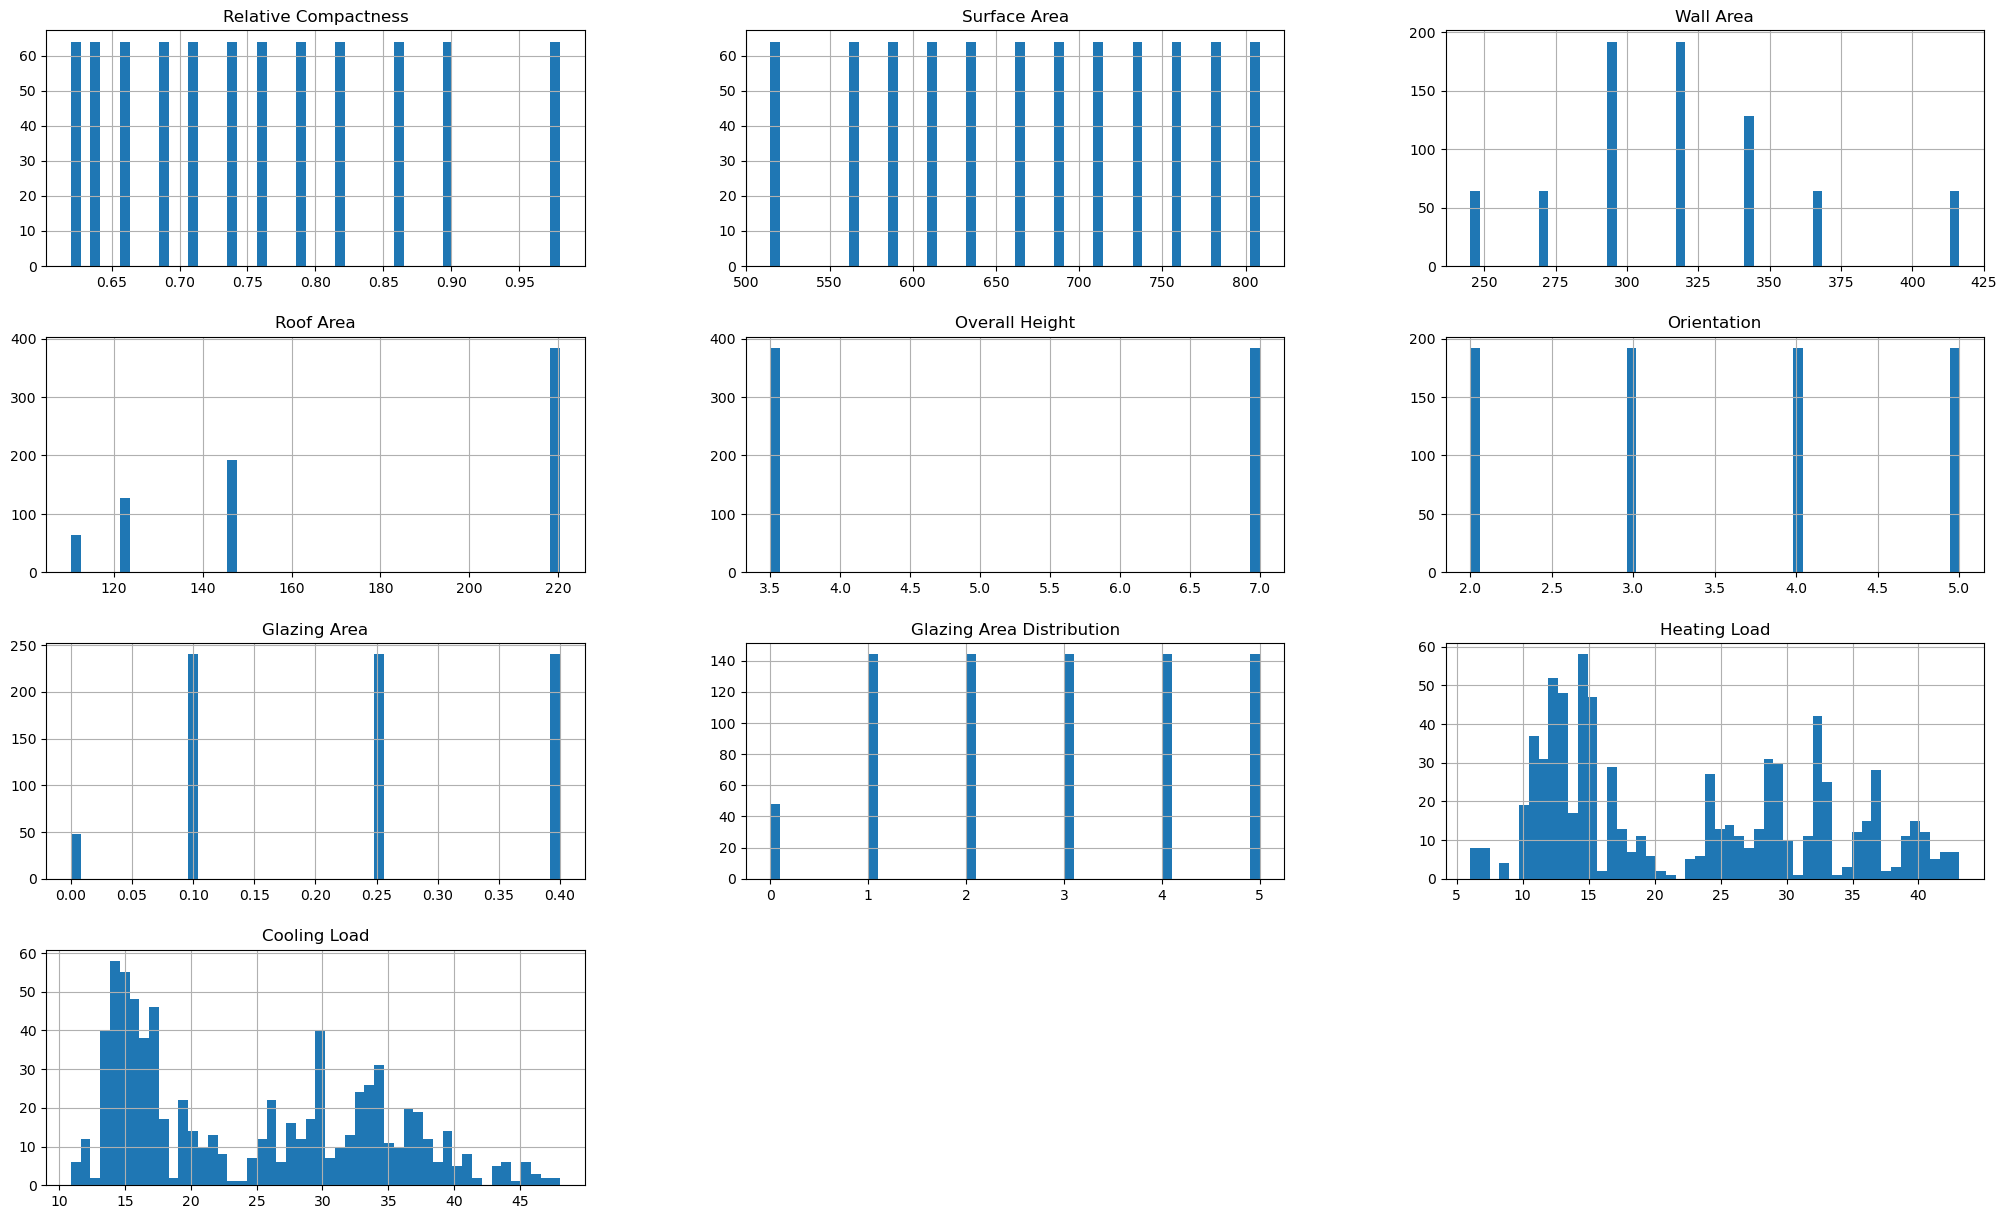

In [36]:
data.hist(figsize=(25,15),bins=50)
plt.show()


In [12]:
cols = data.columns
cols

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [13]:
for c in cols:
    print("{c} Column has {u} unique values in it".format(c=c,u = np.count_nonzero(data[c].unique())))

Relative Compactness Column has 12 unique values in it
Surface Area Column has 12 unique values in it
Wall Area Column has 7 unique values in it
Roof Area Column has 4 unique values in it
Overall Height Column has 2 unique values in it
Orientation Column has 4 unique values in it
Glazing Area Column has 3 unique values in it
Glazing Area Distribution Column has 5 unique values in it
Heating Load Column has 586 unique values in it
Cooling Load Column has 636 unique values in it


<Axes: >

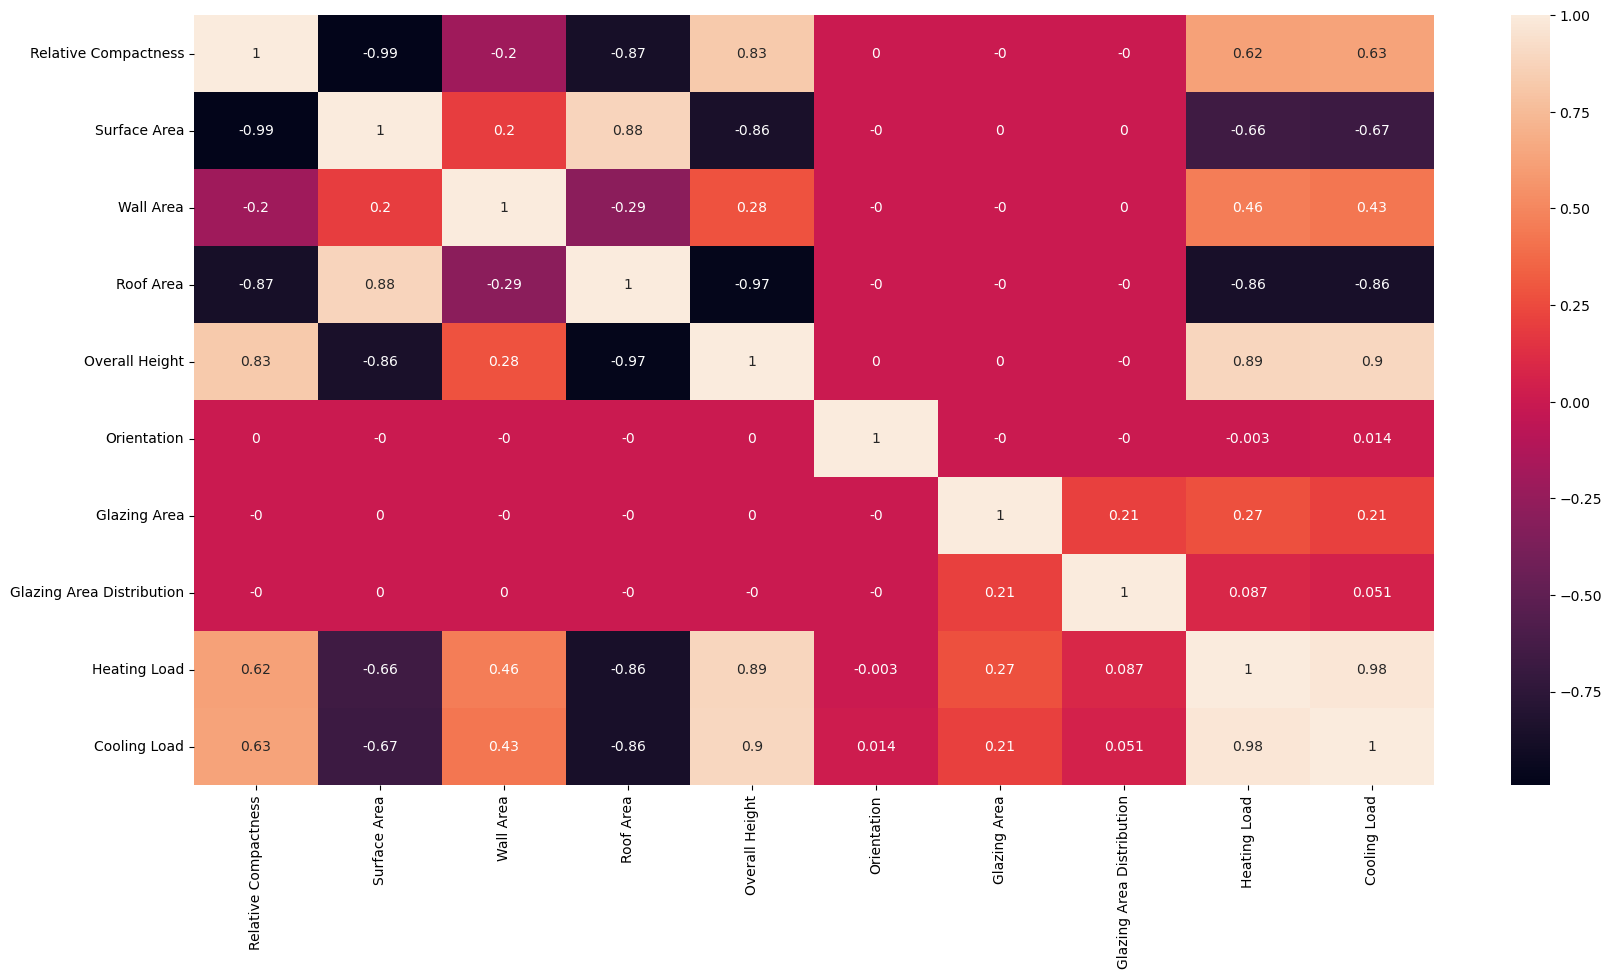

In [14]:
plt.figure(figsize=(20,10))

sns.heatmap(round(data.corr(),3), annot=True)

In [15]:
round(data.corr(),3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000,-0.992,-0.204,-0.869,0.828,0.000,-0.000,-0.000,0.622,0.634
Surface Area,-0.992,1.000,0.196,0.881,-0.858,-0.000,0.000,0.000,-0.658,-0.673
Wall Area,-0.204,0.196,1.000,-0.292,0.281,-0.000,-0.000,0.000,0.456,0.427
Roof Area,-0.869,0.881,-0.292,1.000,-0.973,-0.000,-0.000,-0.000,-0.862,-0.863
Overall Height,0.828,-0.858,0.281,-0.973,1.000,0.000,0.000,-0.000,0.889,0.896
Orientation,0.000,-0.000,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.003,0.014
Glazing Area,-0.000,0.000,-0.000,-0.000,0.000,-0.000,1.000,0.213,0.270,0.208
Glazing Area Distribution,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.213,1.000,0.087,0.051
Heating Load,0.622,-0.658,0.456,-0.862,0.889,-0.003,0.270,0.087,1.000,0.976
Cooling Load,0.634,-0.673,0.427,-0.863,0.896,0.014,0.208,0.051,0.976,1.000


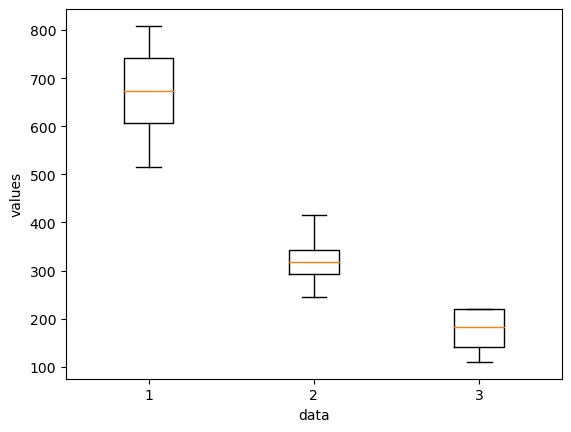

In [32]:
plt.xlabel('data')
plt.ylabel('values')
plt.boxplot(data[["Surface Area","Wall Area","Roof Area"]])
plt.show()


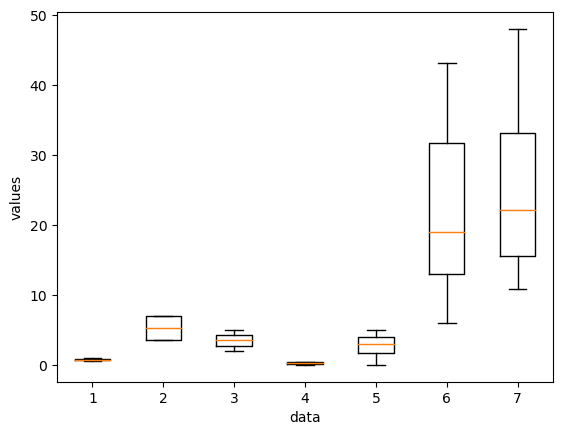

In [33]:

plt.xlabel('data')
plt.ylabel('values')
plt.boxplot(data[["Relative Compactness","Overall Height","Orientation","Glazing Area",
                "Glazing Area Distribution", "Heating Load", "Cooling Load"]])
plt.show()

In [18]:
features = ["Roof Area"]  # Feature(s) to use for prediction
target_heating = "Heating Load"
target_cooling = "Cooling Load"

In [19]:
X = data[features]
y_heating = data[target_heating]
y_cooling = data[target_cooling]


In [20]:
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X, y_cooling, test_size=0.2, random_state=42)


In [21]:
def run_regression_tree(X_train, y_train, X_test, y_test, target_name):
    # Initialize the DecisionTreeRegressor
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{target_name} - Mean Squared Error: {mse:.2f}")
    print(f"{target_name} - R-squared: {r2:.2f}")
    plt.scatter(y_test, y_pred)
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Actual vs Predicted {target_name}")
    plt.show()
    plt.figure(figsize=(12, 8))
    tree.plot_tree(model, feature_names=features, filled=True)
    plt.show()
    

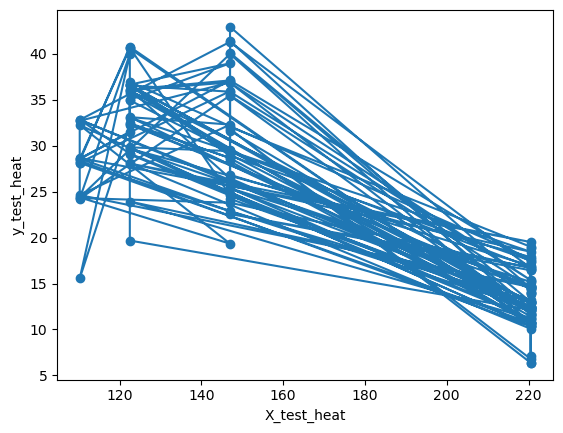

In [34]:
plt.plot(X_test_heat,y_test_heat)
plt.scatter(X_test_heat,y_test_heat)
plt.xlabel('X_test_heat')
plt.ylabel('y_test_heat')
plt.show()

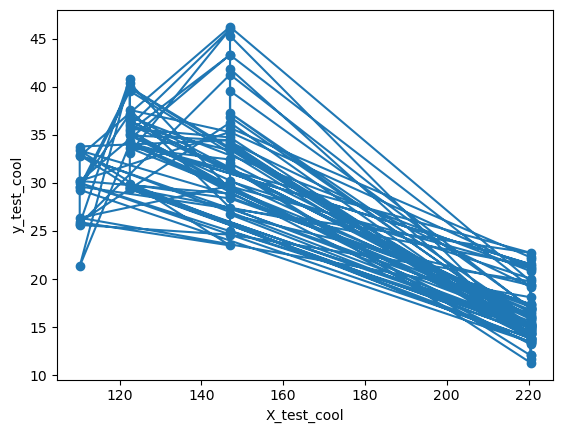

In [35]:
plt.plot(X_test_cool,y_test_cool)
plt.scatter(X_test_cool,y_test_cool)
plt.xlabel('X_test_cool')
plt.ylabel('y_test_cool')
plt.show()


Heating Load - Mean Squared Error: 19.61
Heating Load - R-squared: 0.81


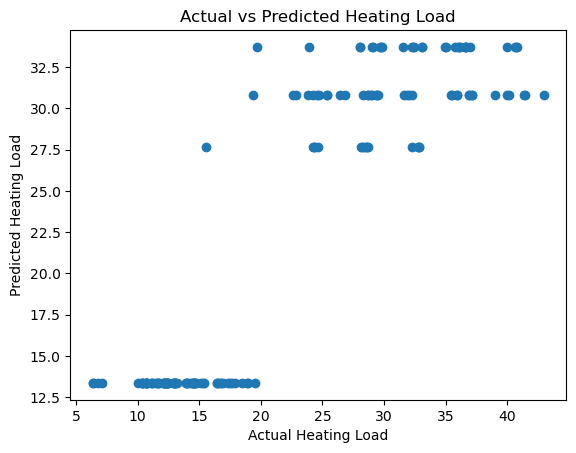

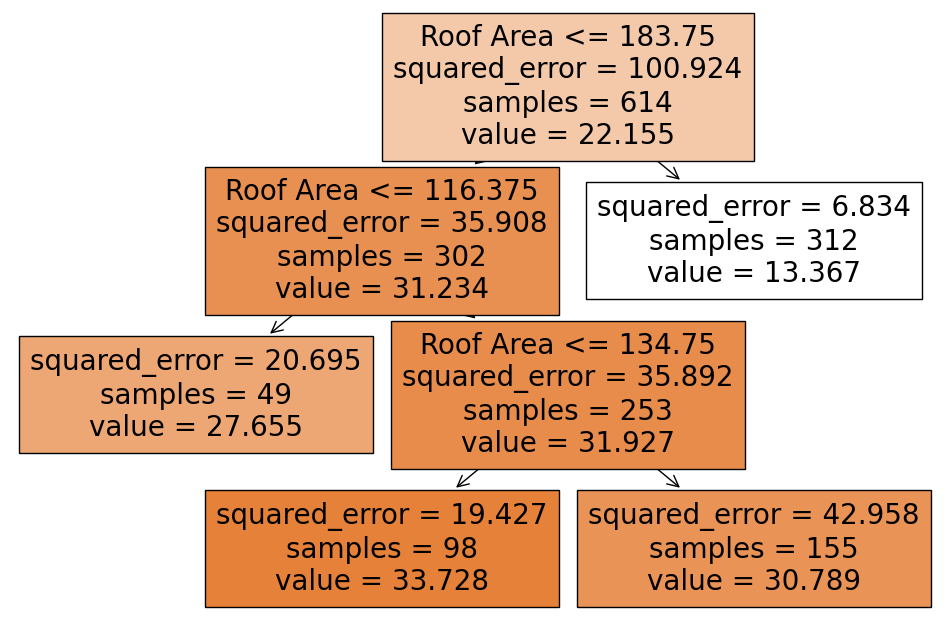

In [24]:
run_regression_tree(X_train_heat, y_train_heat, X_test_heat, y_test_heat, target_name="Heating Load")


Cooling Load - Mean Squared Error: 15.95
Cooling Load - R-squared: 0.83


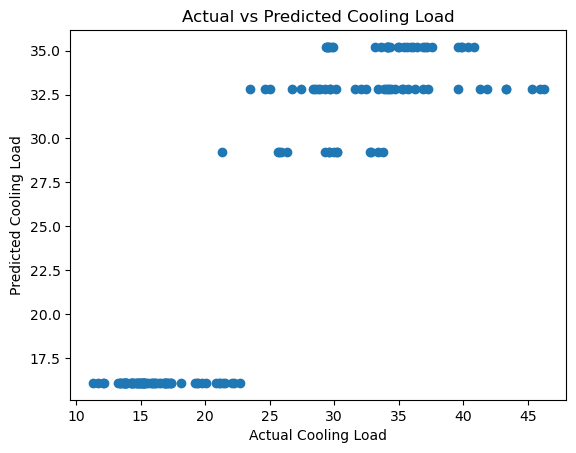

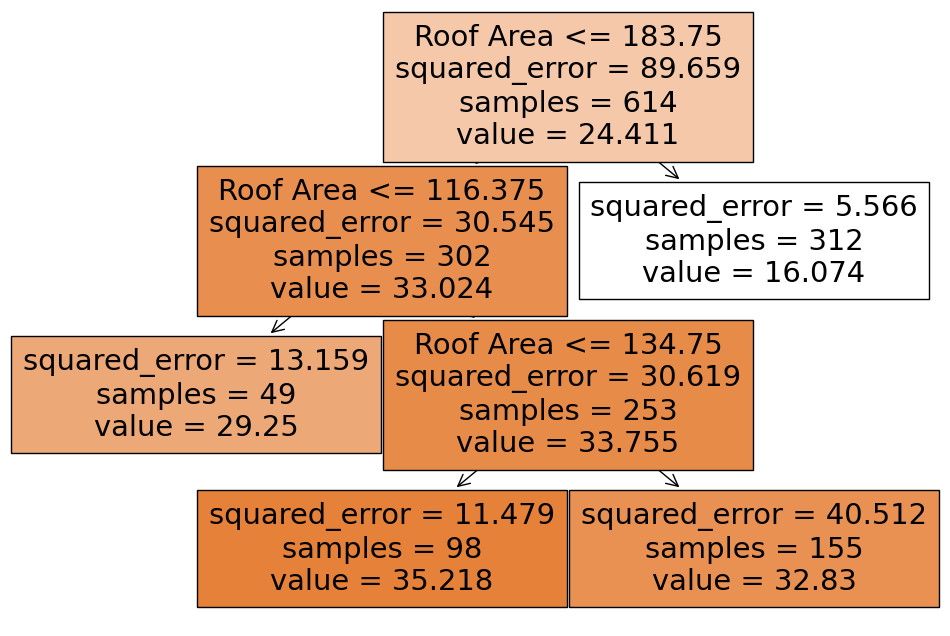

In [25]:
run_regression_tree(X_train_cool, y_train_cool, X_test_cool, y_test_cool, target_name="Cooling Load")


In [49]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
import numpy as np 
#RMSE value 
print( "RMSE: ",np.sqrt( mean_squared_error( X_test_heat, y_test_heat ) )) 
#R-squared value 
print( "R-squared: ",r2_score( X_test_heat, y_test_heat ) )

RMSE:  159.7849147443842
R-squared:  -11.171538900573099


In [26]:
#RMSE value 
print( "RMSE: ",np.sqrt( mean_squared_error( X_test_cool, y_test_cool ) )) 
#R-squared value 
print( "R-squared: ",r2_score( X_test_cool, y_test_cool ) )

RMSE:  157.36320781150616
R-squared:  -10.805390053657545
